<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/lab4_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.) Regularization is defined as...

The minimization of the sum of squared residuals subject to a constraint on the weights (aka coefficients).

2.) The regularization with the square of an L2 distance may improve the results compared to OLS when the number of features is higher than the number of observations.

True

3.) The L1 norm always yields shorter distances compared to the Euclidean norm (L2).

False

4.) Typically, the regularization is achieved by...

minimizing the sum of squared residuals times the average of the L1 norm of the coefficients.

5.) A regularization method that facilitates variable selection (estimating some coefficients as zero) is 

Ridge

6.) Write your own Python code to import the Boston housing data set (from the sklearn library) and scale the data (not the target) by z-scores. If we use all the features with the Linear Regression to predict the target variable then the root mean squared error (RMSE) is:

(your answer should include only the first 4 decimals that you get from the code)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import PolynomialFeatures

In [8]:
scale = StandardScaler()

In [9]:
data = load_boston()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
y = data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
xscaled = scale.fit_transform(df)

In [15]:
lm = LinearRegression()
lm.fit(xscaled,y)
yhat_lm = lm.predict(xscaled)
#MSE
mse = np.mean((y-yhat_lm)**2)
print(mse)

21.894831181729206


In [14]:
rmse = np.sqrt(MSE(y,yhat_lm))
print(rmse)

4.679191295697282


7.) On the Boston housing data set if we consider the Lasso model with 'alpha=0.03' then the 10-fold cross-validated prediction error is:

(for the 10-fold cross-validation shuffle you should use random_state=1234, your final answer should include only the first 4 decimals that you get from the code)

In [64]:
kf = KFold(n_splits=10, random_state=1234, shuffle=True)
i = 0
PE = []
lasso = Lasso(alpha=0.03)
for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    y_train = y[train_index]
    X_test = df.values[test_index]
    y_test = y[test_index]
    model = lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    PE.append(np.sqrt(MSE(y_test, y_pred)))

print('The k-fold crossvalidated prediction error is: ' + str(np.mean(PE)))

The k-fold crossvalidated prediction error is: 4.837045365806388


8.) On the Boston housing data set if we consider the Elastic Net model with 'alpha=0.05' and 'l1_ratio=0.9' then the 10-fold cross-validated prediction error is:

(for the 10-fold cross-validation shuffle you should use random_state=1234, your final answer should include only the first 4 decimals that you get from the code)

In [ ]:
kf = KFold(n_splits=10, random_state=1234, shuffle=True)
i = 0
PE = []
lasso = Lasso(alpha=0.03)
for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    y_train = y[train_index]
    X_test = df.values[test_index]
    y_test = y[test_index]
    model = lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    PE.append(np.sqrt(MSE(y_test, y_pred)))

print('The k-fold crossvalidated prediction error is: ' + str(np.mean(PE)))

In [65]:
X = df.values
kf = KFold(n_splits=10, random_state=1234, shuffle=True)
model = Lasso(alpha=0.03)
scale = StandardScaler()
pipe = Pipeline([('Scale',scale),('Regressor',model)])
def DoKFold(X,y,model):
  PE = []
  for idxtrain,idxtest in kf.split(X):
    Xtrain = X[idxtrain,:]
    Xtest = X[idxtest,:]
    ytrain = y[idxtrain]
    ytest = y[idxtest]
    pipe.fit(Xtrain,ytrain)
    yhat = pipe.predict(Xtest)
    PE.append(MSE(ytest,yhat))
  return str(np.mean(PE))

In [66]:
DoKFold(X,y,model)

'24.26055570572141'

In [67]:
X = df.values
kf = KFold(n_splits=10, random_state=1234, shuffle=True)
model = ElasticNet(alpha=0.05, l1_ratio=0.9)
scale = StandardScaler()
pipe = Pipeline([('Scale',scale),('Regressor',model)])
def DoKFold(X,y,model):
  PE = []
  for idxtrain,idxtest in kf.split(X):
    Xtrain = X[idxtrain,:]
    Xtest = X[idxtest,:]
    ytrain = y[idxtrain]
    ytest = y[idxtest]
    pipe.fit(Xtrain,ytrain)
    yhat = pipe.predict(Xtest)
    PE.append(MSE(ytest,yhat))
  return str(np.mean(PE))

In [68]:
DoKFold(X,y,model)

'24.310376851701204'

9.) If we create all quadratic polynomial (degree=2) features based on the z-scores of the original features and then apply OLS, the root mean squared error is:

In [71]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(xscaled)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# the root mean squared error
rmse = np.sqrt(MSE(y,y_poly_pred))
print(rmse)

2.448373257727784


10.) If we create all quadratic polynomial (degree=2) features based on the z-scores of the original features and then apply the Ridge regression with alpha=0.1 and we create a Quantile-Quantile plot for the residuals then the result shows that  the obtained residuals pretty much follow a normal distribution.

In [78]:
print(xscaled.shape)
print(y.shape)
print(x_poly.shape)
print(y_poly_pred.shape)
print(X.shape)

(506, 13)
(506,)
(506, 105)
(506,)
(506, 13)


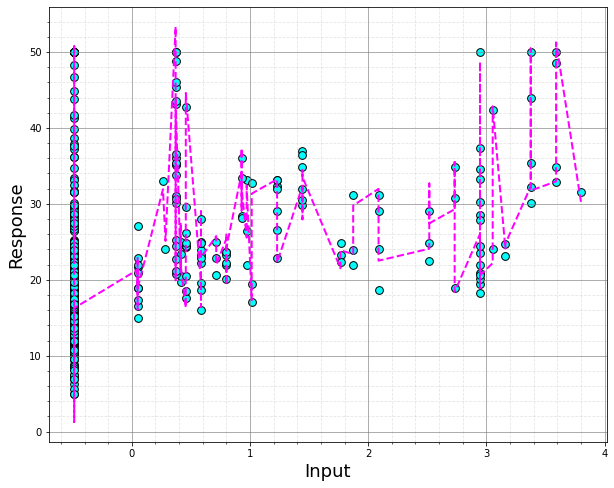

In [82]:
import operator
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(xscaled)

model = Ridge(alpha=0.1)
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
    
fig, ax =plt.subplots(figsize=(10,8))
ax.scatter(xscaled[:,1], y, color='cyan',edgecolors='k',s=60)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xscaled[:,1],y_poly_pred), key=sort_axis)
xp, y_poly_pred = zip(*sorted_zip)
plt.plot(xp, y_poly_pred, color='magenta',linestyle='--',lw=2)
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Response',fontsize=18)
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()